# TS1:sintesis de señales
### Francisco Mato
## Introduccion
para poder sintetizar señales de forma digital es nesesario que la señal este dada de forma discreta, de este modo podemos hacernos una idea de como se veria la señal de forma continua. entonces como la señal es discreta, los datos van a estar compuestos por muestras. para saber cuantas muestras son nesesarias utilizaremos el teorema del muestreo el cual postula que :sea la señal de banda limitada tal que se determinan mediante sus muestras, y 
\begin{equation}
ws>>2wm 
\end{equation}
con ws la frecuencia de muestreo y wm la frecuencia de la señal, es posible reconstruir la señal original.
ortogonalidad
autocorrelacion y correlacion


## Analisis y Discucion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sp

ff=2000
periodos_visible=3
N=1000
fs=N*ff/periodos_visible
deltaf=fs/N

t=np.arange(0,(N)/fs,1/fs)

seno=np.sin(ff*2*np.pi*t)

des_seno=(np.pi/2)*np.sin(ff*2*np.pi*t+np.pi/2)

modulado_seno=np.sin(ff*2*np.pi*t)*np.sin((ff/2)*2*np.pi*t)

potencia=(1/(N))*np.sum(np.abs(seno)**2)

recortada=np.clip(seno,-potencia*0.75,potencia*0.75)


cuadrada= sp.square(4000*2*np.pi * t)

t_pulso=np.arange(0,0.03,0.03/N)
pulso=np.zeros(N,dtype=float)
for k in np.arange(0,N):
    if(t_pulso[k]<0.01):
        
        pulso[k]=1
    else:
        pulso[k]=0

muestras:  1000  tiempo entre muestras:  1.5e-06  potencia:  0.5


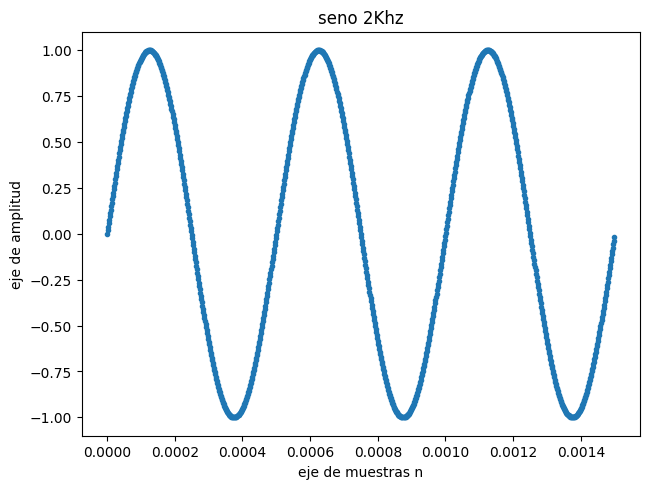

In [45]:
potencia=np.sum(np.abs(seno)**2)*(1/N)
print("muestras: ",N," tiempo entre muestras: ",1/fs," potencia: ",potencia)
plt.figure(1)
plt.plot(t,seno,linestyle='',marker=".")
plt.title('seno 2Khz')
plt.tight_layout() 
plt.xlabel('eje de muestras n')
plt.ylabel('eje de amplitud')

plt.draw()

muestras:  1000  tiempo entre muestras:  1.5e-06  potencia:  1.2337005501361695


<function matplotlib.pyplot.show(close=None, block=None)>

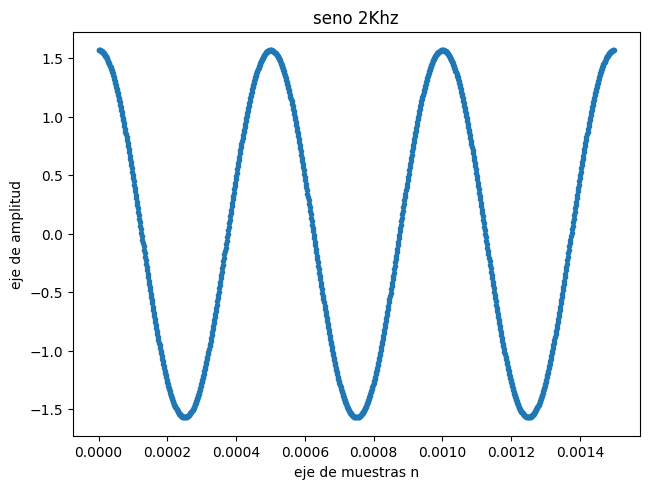

In [44]:
potencia=np.sum(np.abs(des_seno)**2)*(1/N)
print("muestras: ",N," tiempo entre muestras: ",1/fs," potencia: ",potencia)
plt.figure(1)
plt.plot(t,des_seno,linestyle='',marker=".")
plt.title('seno 2Khz')
plt.tight_layout() 
plt.xlabel('eje de muestras n')
plt.ylabel('eje de amplitud')

plt.draw()


muestras:  1000  tiempo entre muestras:  1.5e-06  potencia:  0.25000000000000006


<function matplotlib.pyplot.show(close=None, block=None)>

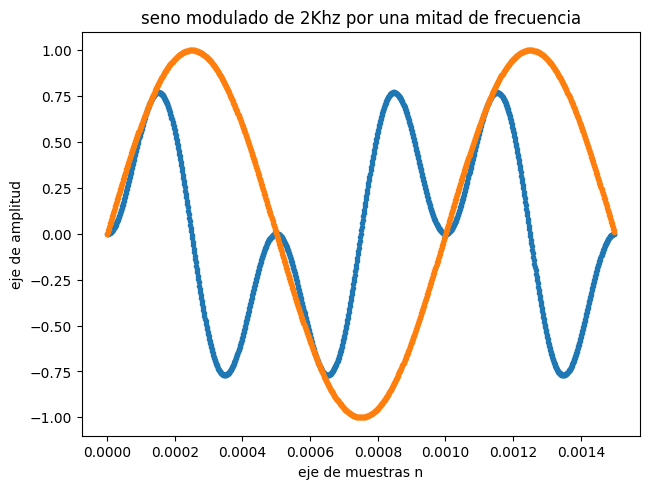

In [43]:
potencia=np.sum(np.abs(modulado_seno)**2)*(1/N)
print("muestras: ",N," tiempo entre muestras: ",1/fs," potencia: ",potencia)
plt.figure(1)
plt.plot(t,modulado_seno,linestyle='',marker=".")
plt.plot(t,np.sin((ff/2)*2*np.pi*t),linestyle='',marker=".")
plt.title('seno modulado de 2Khz por una mitad de frecuencia')
plt.tight_layout() 
plt.xlabel('eje de muestras n')
plt.ylabel('eje de amplitud')

plt.draw()
plt.show

muestras:  1000  tiempo entre muestras:  1.5e-06  potencia:  0.1179140413508801


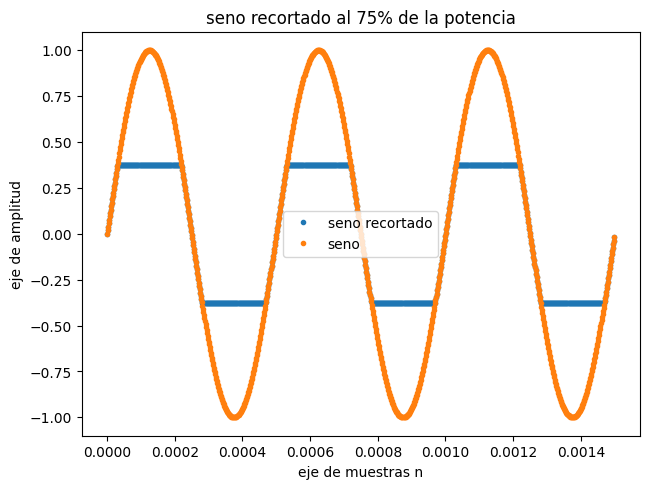

In [41]:
potencia=np.sum(np.abs(recortada)**2)*(1/N)
print("muestras: ",N," tiempo entre muestras: ",1/fs," potencia: ",potencia)
plt.figure(1)
plt.plot(t,recortada,label='seno recortado',linestyle='',marker=".")
plt.plot(t,seno,label='seno',linestyle='',marker=".")
plt.legend()
plt.title('seno recortado al 75% de la potencia')
plt.tight_layout() 
plt.xlabel('eje de muestras n')
plt.ylabel('eje de amplitud')

plt.draw()

muestras:  1000  tiempo entre muestras:  1.5e-06  potencia:  1.0


<function matplotlib.pyplot.show(close=None, block=None)>

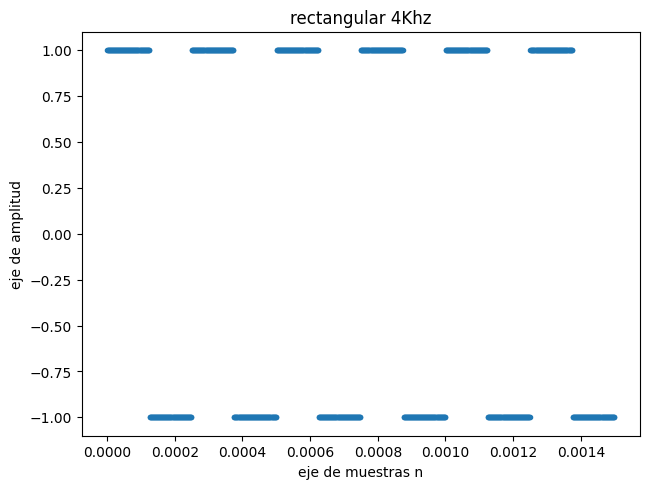

In [39]:
potencia=np.sum(np.abs(cuadrada)**2)*(1/N)
print("muestras: ",N," tiempo entre muestras: ",1/fs," potencia: ",potencia)
plt.figure(1)
plt.plot(t,cuadrada,linestyle='',marker=".")
plt.title('rectangular 4Khz')
plt.tight_layout() 
plt.xlabel('eje de muestras n')
plt.ylabel('eje de amplitud')

plt.draw()
plt.show

muestras:  1000  tiempo entre muestras: 30us  potencia:  0.334


<function matplotlib.pyplot.show(close=None, block=None)>

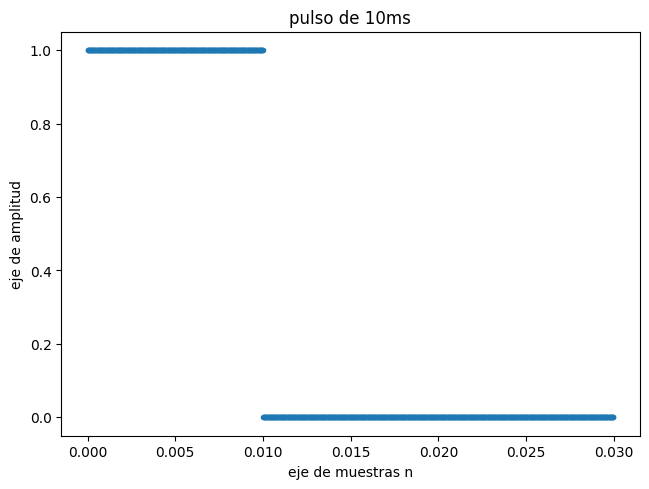

In [37]:
potencia=np.sum(np.abs(pulso)**2)*(1/N)
print("muestras: ",N," tiempo entre muestras: 30us potencia: ",potencia)
plt.figure(1)
plt.plot(t_pulso,pulso,linestyle='',marker=".")
plt.title('pulso de 10ms')
plt.tight_layout() 
plt.xlabel('eje de muestras n')
plt.ylabel('eje de amplitud')

plt.draw()

In [49]:
prointerno_senoXdes_seno=np.inner(seno,des_seno)
print(prointerno_senoXdes_seno)

prointerno_senoXmodulado_seno=np.inner(seno,modulado_seno)
print(prointerno_senoXmodulado_seno)

prointerno_senoXrecortada=np.inner(seno,recortada)
print(prointerno_senoXrecortada)

prointerno_senoXcuadrada=np.inner(seno,cuadrada)
print(prointerno_senoXcuadrada)

prointerno_senoXpulso=np.inner(seno,pulso)
print(prointerno_senoXpulso)

5.01577945843934e-14
113.17684847671818
233.01281443212565
7.4346778733414e-14
-0.0020944088830811003


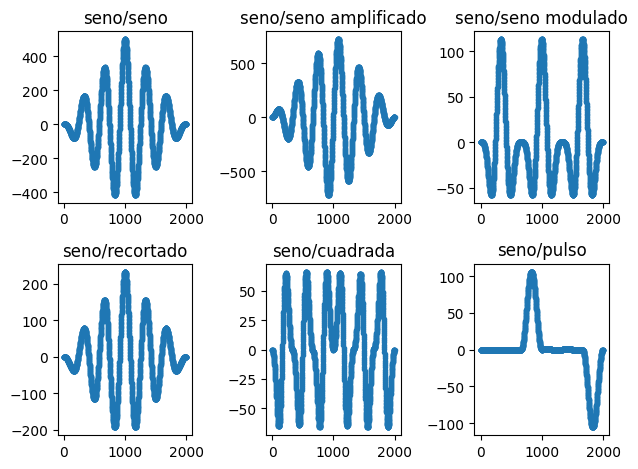

In [55]:
plt.figure(1)

plt.subplot(2,3,1)
plt.plot(np.correlate(seno, seno,mode="full"),linestyle='',marker=".")
plt.title('seno/seno')

plt.subplot(2,3,2)
plt.plot(np.correlate(seno, des_seno,mode="full"),linestyle='',marker=".")
plt.title('seno/seno amplificado')

plt.subplot(2,3,3)
plt.plot(np.correlate(seno, modulado_seno,mode="full"),linestyle='',marker=".")
plt.title('seno/seno modulado')

plt.subplot(2,3,4)
plt.plot(np.correlate(seno, recortada,mode="full"),linestyle='',marker=".")
plt.title('seno/recortado')

plt.subplot(2,3,5)
plt.plot(np.correlate(seno, cuadrada,mode="full"),linestyle='',marker=".")
plt.title('seno/cuadrada')

plt.subplot(2,3,6)
plt.plot(np.correlate(seno, pulso,mode="full"),linestyle='',marker=".")
plt.title('seno/pulso')

plt.tight_layout() 

plt.draw()


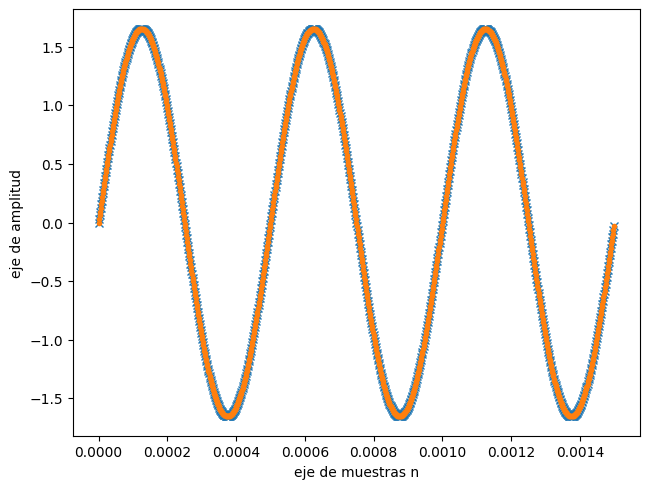

In [61]:
beta=1000
alpha=2*beta*2*np.pi*t
signal_a=2*np.sin(alpha)*np.sin(beta)
signal_b=np.cos((alpha-beta))-np.cos((alpha+beta))
plt.figure(1)
plt.plot(t,signal_a,linestyle='',marker="x")
plt.plot(t,signal_b,linestyle='',marker=".")
plt.tight_layout() 
plt.xlabel('eje de muestras n')
plt.ylabel('eje de amplitud')

plt.draw()


## Conclucion